In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pathlib import Path

In [7]:
# Используем датасет из Kaggle с оценками приложений Google Play Store
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Закодируем в число Content Rating.
df['Content Rating'].value_counts() 

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [11]:
# Обработаем пропуски в колонке
df['Content Rating'].mode().values[0]
df.loc[df['Content Rating'].isna(), ['Content Rating']] = df['Content Rating'].mode().values[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
# Выделим категории и переведем наименование рейтингов в числовой признак
dict_content_rating = {df['Content Rating'].value_counts().index[i]: df['Content Rating'].value_counts().values[i] for i in range(6)}
dict_content_rating

{'Everyone': 8715,
 'Teen': 1208,
 'Mature 17+': 499,
 'Everyone 10+': 414,
 'Adults only 18+': 3,
 'Unrated': 2}

In [25]:
# Добавим поле в датасет
df['Content Rating Index'] = np.NAN

In [27]:
# разделим датасет на две части для автоматической и ручной разметки
df_auto, df_manual = train_test_split(df, train_size=df.shape[0] - 10, random_state=42)
df_manual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 3457 to 8857
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10 non-null     object 
 1   Category              10 non-null     object 
 2   Rating                8 non-null      float64
 3   Reviews               10 non-null     object 
 4   Size                  10 non-null     object 
 5   Installs              10 non-null     object 
 6   Type                  10 non-null     object 
 7   Price                 10 non-null     object 
 8   Content Rating        10 non-null     object 
 9   Genres                10 non-null     object 
 10  Last Updated          10 non-null     object 
 11  Current Ver           10 non-null     object 
 12  Android Ver           10 non-null     object 
 13  Content Rating Index  0 non-null      float64
dtypes: float64(2), object(12)
memory usage: 1.2+ KB


In [28]:
# Сохраним в файл датасет для ручной разметки.
df_manual.to_csv('googleplaystore_manual.csv', index=False)

In [29]:
# Разметим вручную и загрузим размеченный датасет
df_manual_marked = pd.read_csv('googleplaystore_manual.csv')
df_manual_marked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10 non-null     object 
 1   Category              10 non-null     object 
 2   Rating                8 non-null      float64
 3   Reviews               10 non-null     int64  
 4   Size                  10 non-null     object 
 5   Installs              10 non-null     object 
 6   Type                  10 non-null     object 
 7   Price                 10 non-null     object 
 8   Content Rating        10 non-null     object 
 9   Genres                10 non-null     object 
 10  Last Updated          10 non-null     object 
 11  Current Ver           10 non-null     object 
 12  Android Ver           10 non-null     object 
 13  Content Rating Index  10 non-null     int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ KB


In [30]:
# Промаркируем часть датасета на основе правил автоматически
df_auto['Content Rating Index'] = df_auto['Content Rating'].replace(dict_content_rating)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10831 entries, 5802 to 7270
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10831 non-null  object 
 1   Category              10831 non-null  object 
 2   Rating                9359 non-null   float64
 3   Reviews               10831 non-null  object 
 4   Size                  10831 non-null  object 
 5   Installs              10831 non-null  object 
 6   Type                  10830 non-null  object 
 7   Price                 10831 non-null  object 
 8   Content Rating        10831 non-null  object 
 9   Genres                10831 non-null  object 
 10  Last Updated          10831 non-null  object 
 11  Current Ver           10823 non-null  object 
 12  Android Ver           10828 non-null  object 
 13  Content Rating Index  10831 non-null  int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


C:\Users\Od\AppData\Local\Temp\ipykernel_23548\620773339.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_auto['Content Rating Index'] = df_auto['Content Rating'].replace(dict_content_rating)


In [31]:
# Обьеденим датасеты.
df_marked = pd.concat([df_manual_marked, df_auto], axis=0, ignore_index=True, sort=False)
df_marked.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating Index
0,Microsoft Outlook,PRODUCTIVITY,4.3,3252896,50M,"100,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",2.2.194,4.4 and up,8715
1,FotMob - Live Soccer Scores,SPORTS,4.7,410395,Varies with device,"10,000,000+",Free,0,Everyone,Sports,"July 31, 2018",Varies with device,Varies with device,8715
2,EO Guide,HEALTH_AND_FITNESS,NaN,15,24M,"1,000+",Paid,$4.99,Everyone,Health & Fitness,"July 23, 2018",1.0.4,4.1 and up,8715
3,FunForMobile Ringtones & Chat,SOCIAL,4.4,68358,7.2M,"5,000,000+",Free,0,Mature 17+,Social,"May 7, 2016",3.22,4.1 and up,499
4,Oral-B App,HEALTH_AND_FITNESS,3.3,14210,96M,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 19, 2018",6.0.1,5.0 and up,8715


In [33]:
# Выполним разметку с помощью машинного обучения: определим Content Rating Index по наименованию приложения
# разделим датасет на тестовую и обучающую выборки 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, r2_score, confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as  plt 
import seaborn as sns

In [34]:
# df_google_processed = 
dft = shuffle(df_marked)[['App', 'Content Rating Index']]
df_labeled, df_unlabeled = train_test_split(dft, train_size=0.2, random_state=15)
print(df_labeled)
print(df_unlabeled)


                                                   App  Content Rating Index
2260                             Wetter by t-online.de                  8715
6308  Ice Crush 2018 - A new Puzzle Matching Adventure                  8715
3181                                           SPEED L                  8715
2468                                        CW Nuclear                  8715
2755                                  IMDb Movies & TV                  1208
...                                                ...                   ...
3530               漫咖 Comics - Manga,Novel and Stories                   499
1378                                            S Note                  8715
1356                                    Dunkin' Donuts                  8715
9296                          Wedding Countdown Widget                  8715
1418                        Chat Click - Dating Search                   499

[2168 rows x 2 columns]
                                                   

In [244]:
# df_unlabeled_y = df_unlabeled['Content Rating Index']
# df_unlabeled.drop(columns=['Content Rating Index'], inplace=True)
# print(df_unlabeled_y.head(3))
# print(df_unlabeled.head(3))

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_labeled['App'])
# model = LinearRegression()
# model = LogisticRegression()
# model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model = RandomForestClassifier(n_estimators=100)
model.fit(X, df_labeled['Content Rating Index'])

RandomForestClassifier()

In [36]:
X_unlabeled = vectorizer.transform(df_unlabeled['App'])
df_unlabeled_y_pred = model.predict(X_unlabeled)

In [37]:
# df_unlabeled
# X_unlabeled
# print(df_unlabeled_y)
# print(type(df_unlabeled_y_pred))
# print(type(df_unlabeled['Content Rating Index'].values))

In [38]:
df_unlabeled_y_pred 

array([8715, 8715, 8715, ..., 8715, 8715, 8715], dtype=int64)

In [39]:
r2_score(df_unlabeled['Content Rating Index'], df_unlabeled_y_pred)

0.02980193001650122

<Axes: >

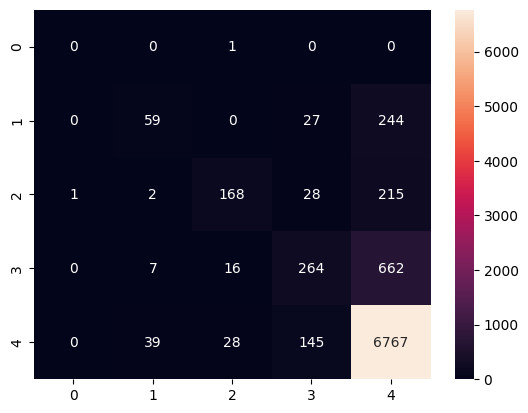

In [40]:
cmm = confusion_matrix(df_unlabeled['Content Rating Index'].values, df_unlabeled_y_pred)
ax = plt.subplot()
sns.heatmap(cmm, annot=True, fmt='g', ax=ax)

In [ ]:
# Точность модели очень низкая, т.к. длины признака - "Наименование приложение" недостаточно для прогнозирования рейтинга приложения.
# Данный признак был использован исключительно в обучающих целях.